In [1]:
#pip install keras

In [2]:
#pip install scikit-learn

In [3]:
#pip install matplotlib

In [4]:
#pip install tensorflow

In [5]:
#pip install pathlib

In [6]:
#pip install PIL

## Adapted from https://towardsdatascience.com/how-to-cluster-images-based-on-visual-similarity-cd6e7209fe34

In [33]:
# for loading/processing the images  
#from keras.preprocessing.image import load_img    ##depreciated
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.utils import img_to_array 
from keras.applications.vgg16 import preprocess_input 

# models 
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19 
from keras.models import Model

# clustering and dimension reduction
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# for everything else
import os
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import pandas as pd
import pickle
import pathlib
import PIL

In [26]:
## Couldn't get this to work

# path = r"C:/Users/dunphsi1/OneDrive - Novartis Pharma AG/Data Science Course/699/Images 2/Images"
# image_dir = tf.keras.utils.get_file('Images', 'file://'+path)
# image_dir = pathlib.Path(image_dir)
# # image_count = len(list(image_dir.glob('*/*.jpg')))
# # print(image_count)
# image_dir


In [15]:
# image_count = len(list(image_dir.glob('*/*.jpg')))
# image_count

0

In [28]:
# tf.keras.utils.image_dataset_from_directory(
#     image_dir)

In [37]:
path = r"C:\Users\dunphsi1\OneDrive - Novartis Pharma AG\Data Science Course\699\Images 2\Images"
os.chdir(path)

# this list holds all the image filename
images = []

# creates a ScandirIterator aliased as files
with os.scandir(path) as files:
  # loops through each file in the directory
    for file in files:
        if file.name.endswith('.jpg'):
          # adds only the image files to the flowers list
            images.append(file.name)

len(images)

240

In [27]:
images[0]

'image_0.jpg'

In [31]:
# load the image as a 224x224 array
img = load_img(images[0], target_size=(224,224))
# convert from 'PIL.Image.Image' to numpy array
img = np.array(img)

print(img.shape)
(224, 224, 3)

reshaped_img = img.reshape(1,224,224,3)
print(reshaped_img.shape)
(1, 224, 224, 3)

x = preprocess_input(reshaped_img)

(224, 224, 3)
(1, 224, 224, 3)


In [34]:
# load model
model = VGG16()
# remove the output layer
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)

553467096/553467096 [==============================] - 278s 1us/step


In [36]:
def extract_features(file, model):
    # load the image as a 224x224 array
    img = load_img(file, target_size=(224,224))
    # convert from 'PIL.Image.Image' to numpy array
    img = np.array(img) 
    # reshape the data for the model reshape(num_of_samples, dim 1, dim 2, channels)
    reshaped_img = img.reshape(1,224,224,3) 
    # prepare image for model
    imgx = preprocess_input(reshaped_img)
    # get the feature vector
    features = model.predict(imgx, use_multiprocessing=True)
    return features

In [39]:
data = {}
p = r"C:\Users\dunphsi1\OneDrive - Novartis Pharma AG\Data Science Course\699\Images_2_features.pkl"

# lop through each image in the dataset
for image in images:
    # try to extract the features and update the dictionary
    try:
        feat = extract_features(image,model)
        data[image] = feat
    # if something fails, save the extracted features as a pickle file (optional)
    except:
        with open(p,'wb') as file:
            pickle.dump(data,file)

# get a list of the filenames
filenames = np.array(list(data.keys()))

# get a list of just the features
feat = np.array(list(data.values()))
feat.shape
(210, 1, 4096)

# reshape so that there are 210 samples of 4096 vectors
feat = feat.reshape(-1,4096)
feat.shape
(210, 4096)

# get the unique labels (from the flower_labels.csv)
# df = pd.read_csv('flower_labels.csv')
# label = df['label'].tolist()
# unique_labels = list(set(label))

1/1 [==============================] - 0s 389ms/step


(210, 4096)

In [40]:
pca = PCA(n_components=100, random_state=22)
pca.fit(feat)
x = pca.transform(feat)

In [42]:
kmeans = KMeans(n_clusters=10, random_state=22)
kmeans.fit(x)

c:\program files\python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=10, random_state=22)

In [43]:
kmeans.labels_

array([7, 7, 7, 0, 2, 8, 1, 6, 5, 2, 2, 8, 1, 1, 8, 3, 8, 4, 6, 3, 8, 4,
       8, 4, 6, 8, 6, 0, 5, 5, 0, 0, 5, 5, 5, 1, 5, 5, 1, 1, 1, 4, 6, 1,
       8, 4, 3, 8, 3, 4, 7, 4, 7, 4, 2, 7, 7, 6, 7, 4, 7, 1, 6, 5, 3, 3,
       3, 0, 6, 3, 3, 5, 3, 3, 1, 0, 5, 3, 0, 1, 0, 8, 5, 2, 5, 3, 1, 0,
       5, 1, 1, 1, 0, 2, 5, 2, 1, 1, 0, 0, 5, 6, 5, 0, 0, 5, 5, 5, 5, 5,
       6, 0, 2, 1, 1, 6, 0, 6, 0, 3, 8, 5, 1, 0, 1, 6, 2, 5, 6, 0, 6, 5,
       5, 6, 5, 0, 6, 6, 5, 5, 0, 0, 5, 5, 0, 4, 1, 4, 7, 7, 4, 4, 2, 4,
       4, 8, 4, 5, 6, 6, 6, 6, 8, 7, 5, 5, 5, 6, 1, 3, 1, 0, 0, 3, 1, 3,
       1, 3, 3, 1, 0, 5, 8, 0, 0, 4, 1, 8, 2, 8, 6, 7, 7, 7, 4, 7, 2, 4,
       7, 7, 7, 4, 4, 1, 8, 6, 8, 7, 1, 1, 1, 1, 2, 8, 1, 1, 1, 9, 2, 9,
       9, 9, 9, 9, 9, 9, 9, 1, 6, 7, 5, 4, 6, 1, 1, 8, 3, 3, 1, 2])

In [44]:
# holds the cluster id and the images { id: [images] }
groups = {}
for file, cluster in zip(filenames,kmeans.labels_):
    if cluster not in groups.keys():
        groups[cluster] = []
        groups[cluster].append(file)
    else:
        groups[cluster].append(file)

In [45]:
# view the filenames in cluster 0
groups[0]

['image_100.jpg',
 'image_122.jpg',
 'image_125.jpg',
 'image_126.jpg',
 'image_159.jpg',
 'image_166.jpg',
 'image_169.jpg',
 'image_170.jpg',
 'image_177.jpg',
 'image_181.jpg',
 'image_187.jpg',
 'image_188.jpg',
 'image_191.jpg',
 'image_192.jpg',
 'image_199.jpg',
 'image_202.jpg',
 'image_204.jpg',
 'image_209.jpg',
 'image_214.jpg',
 'image_22.jpg',
 'image_224.jpg',
 'image_225.jpg',
 'image_228.jpg',
 'image_37.jpg',
 'image_38.jpg',
 'image_45.jpg',
 'image_48.jpg',
 'image_49.jpg']

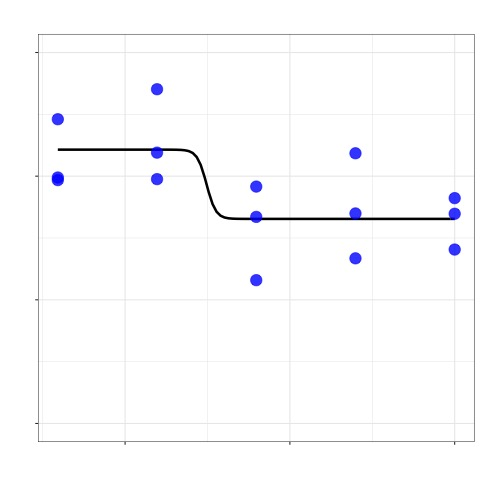

In [57]:
PIL.Image.open(groups[0][0])

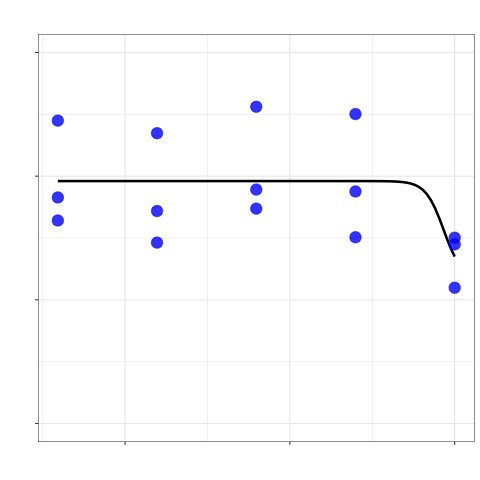

In [58]:
PIL.Image.open(groups[0][1])

In [52]:
# for curve in groups[0]:
#     img = PIL.Image.open(curve)
#     img.show()

In [59]:
# images = [PIL.Image.open(name) for name in groups[0]] 
# images

In [60]:
# function that lets you view a cluster (based on identifier)        
def view_cluster(cluster):
    plt.figure(figsize = (25,25));
    # gets the list of filenames for a cluster
    files = groups[cluster]
    # only allow up to 30 images to be shown at a time
    if len(files) > 30:
        print(f"Clipping cluster size from {len(files)} to 30")
        files = files[:29]
    # plot each image in the cluster
    for index, file in enumerate(files):
        plt.subplot(10,10,index+1);
        img = load_img(file)
        img = np.array(img)
        plt.imshow(img)
        plt.axis('off')

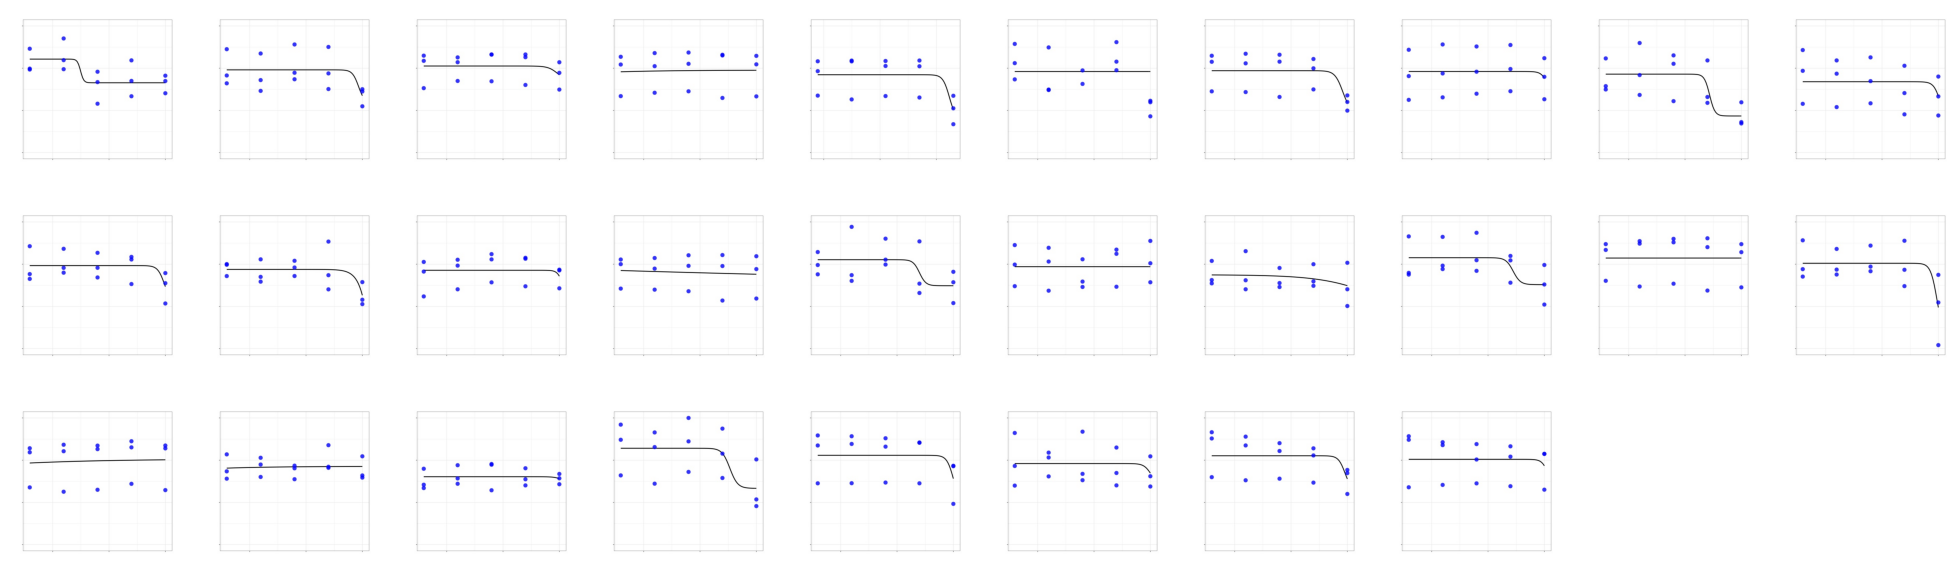

In [62]:
view_cluster(0)

Clipping cluster size from 40 to 30


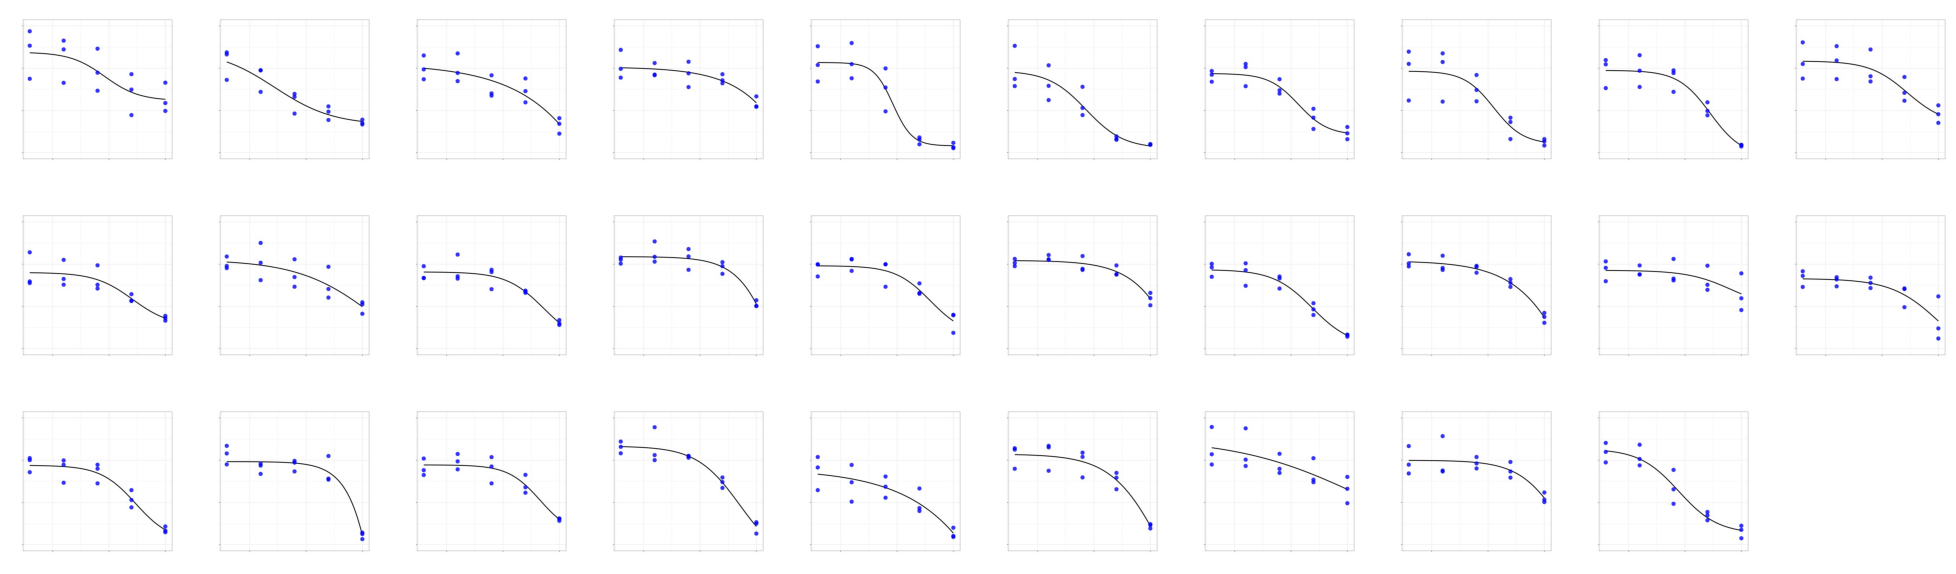

In [64]:
view_cluster(1)

CLUSTER  0
CLUSTER  1
Clipping cluster size from 40 to 30
CLUSTER  2
CLUSTER  3
CLUSTER  4
CLUSTER  5
Clipping cluster size from 37 to 30
CLUSTER  6
CLUSTER  7
CLUSTER  8
CLUSTER  9


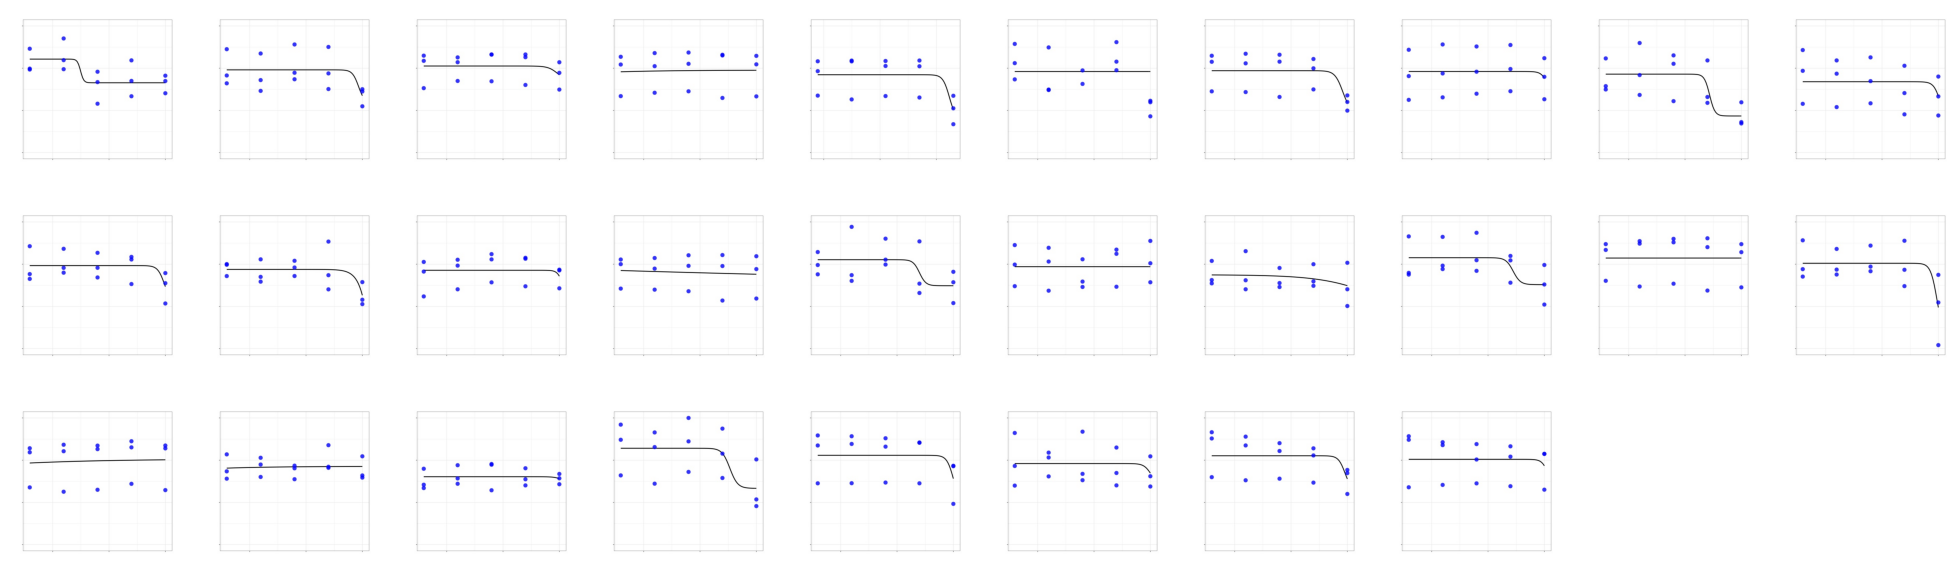

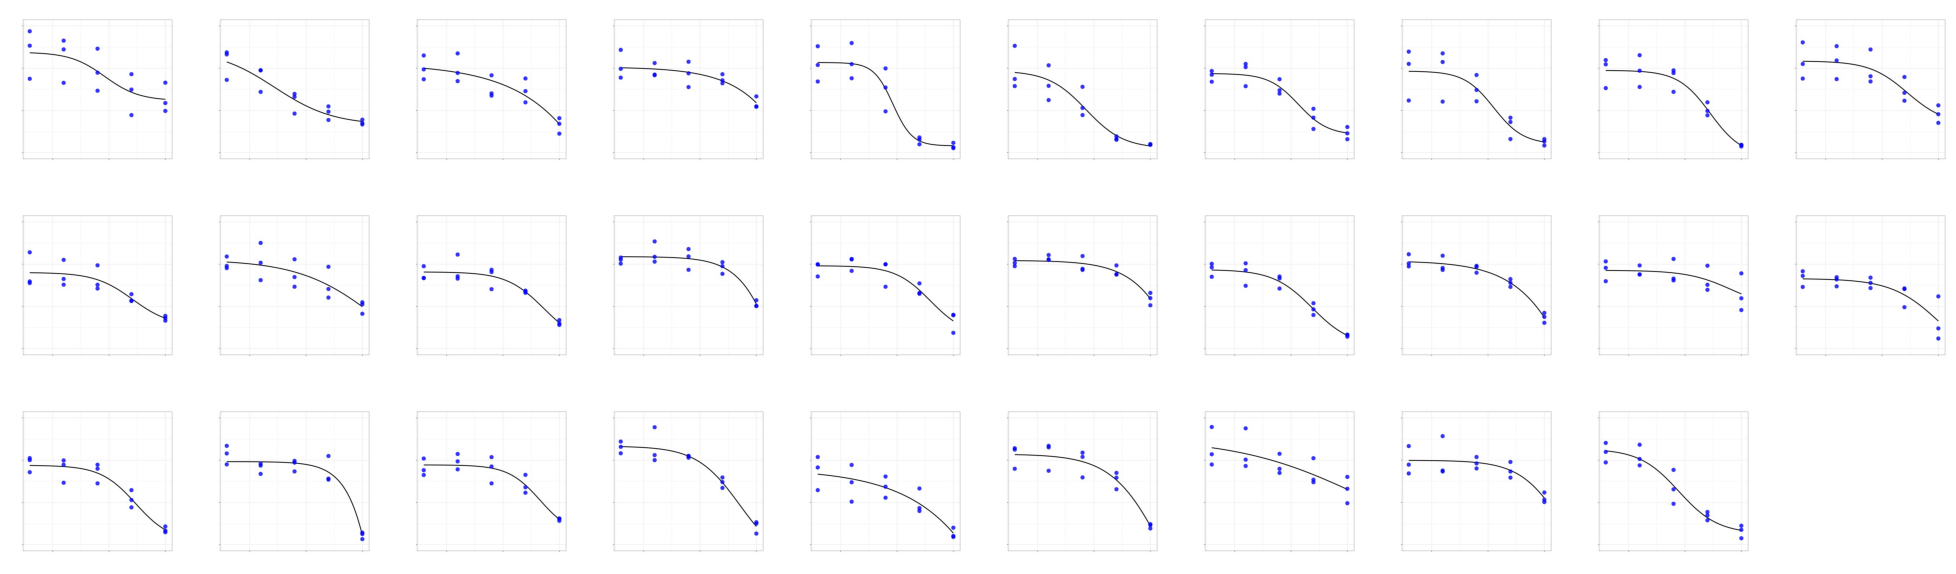

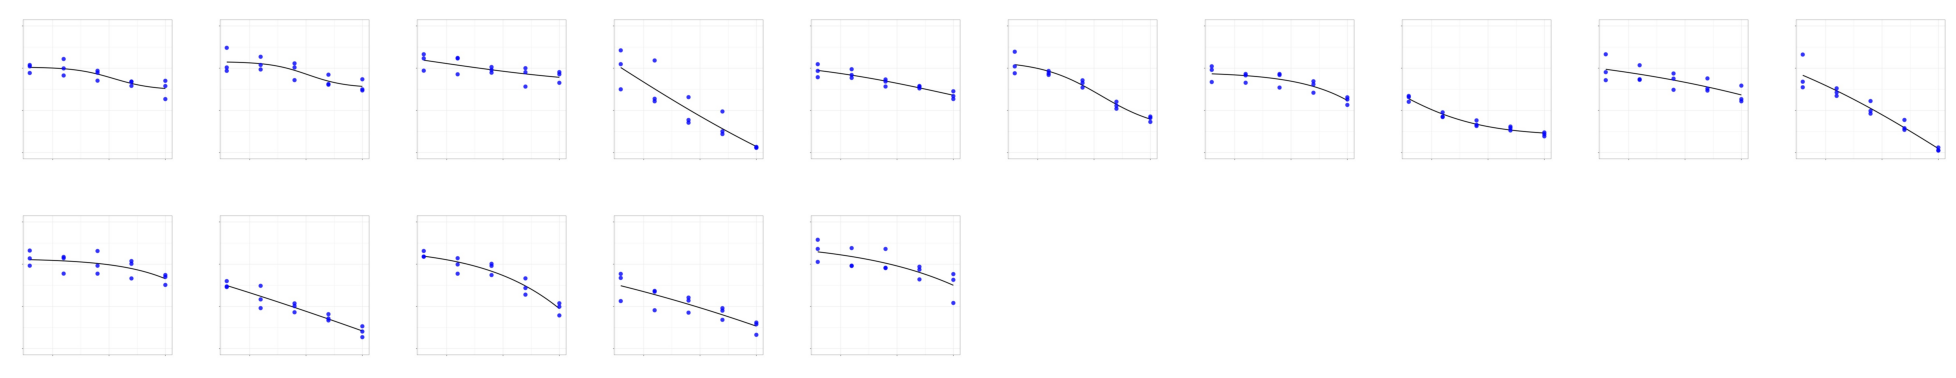

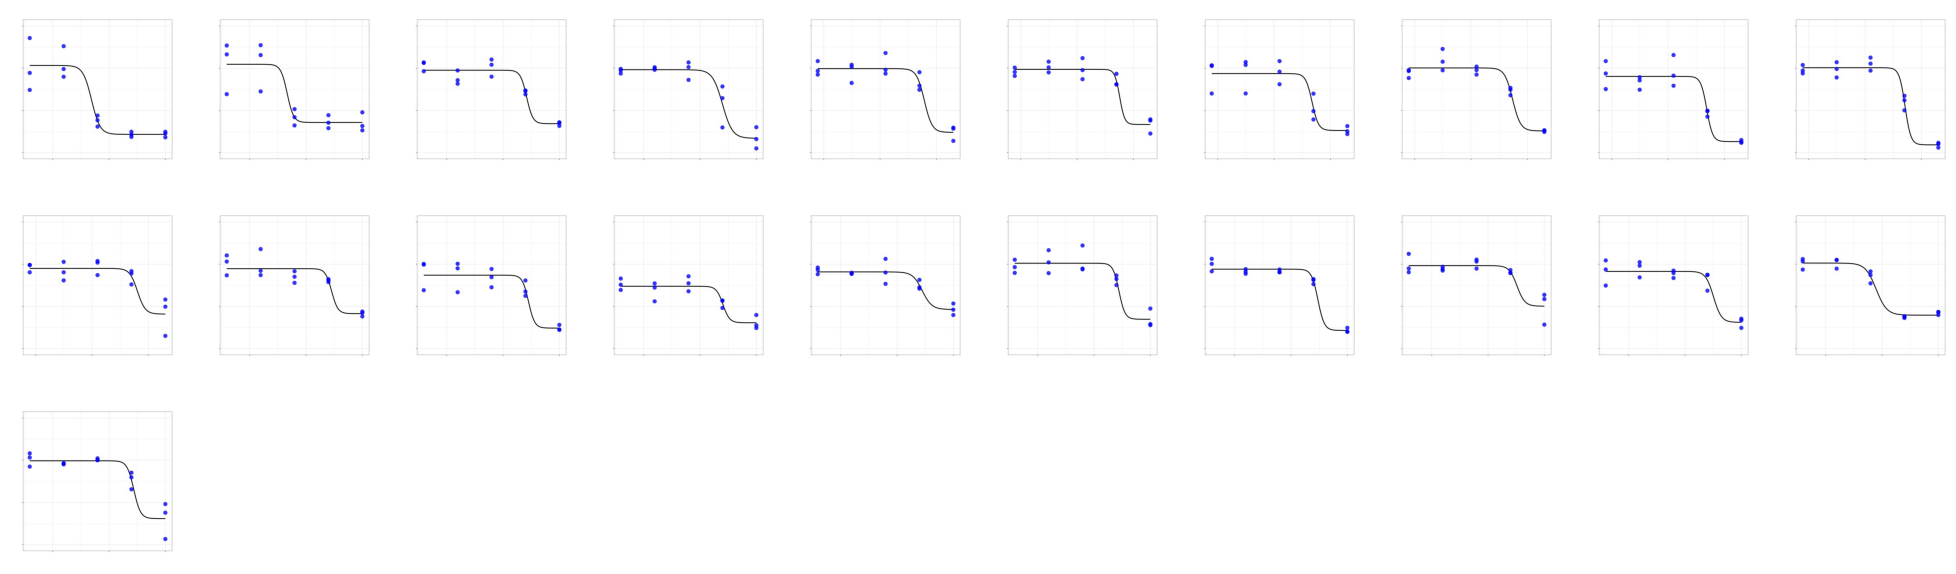

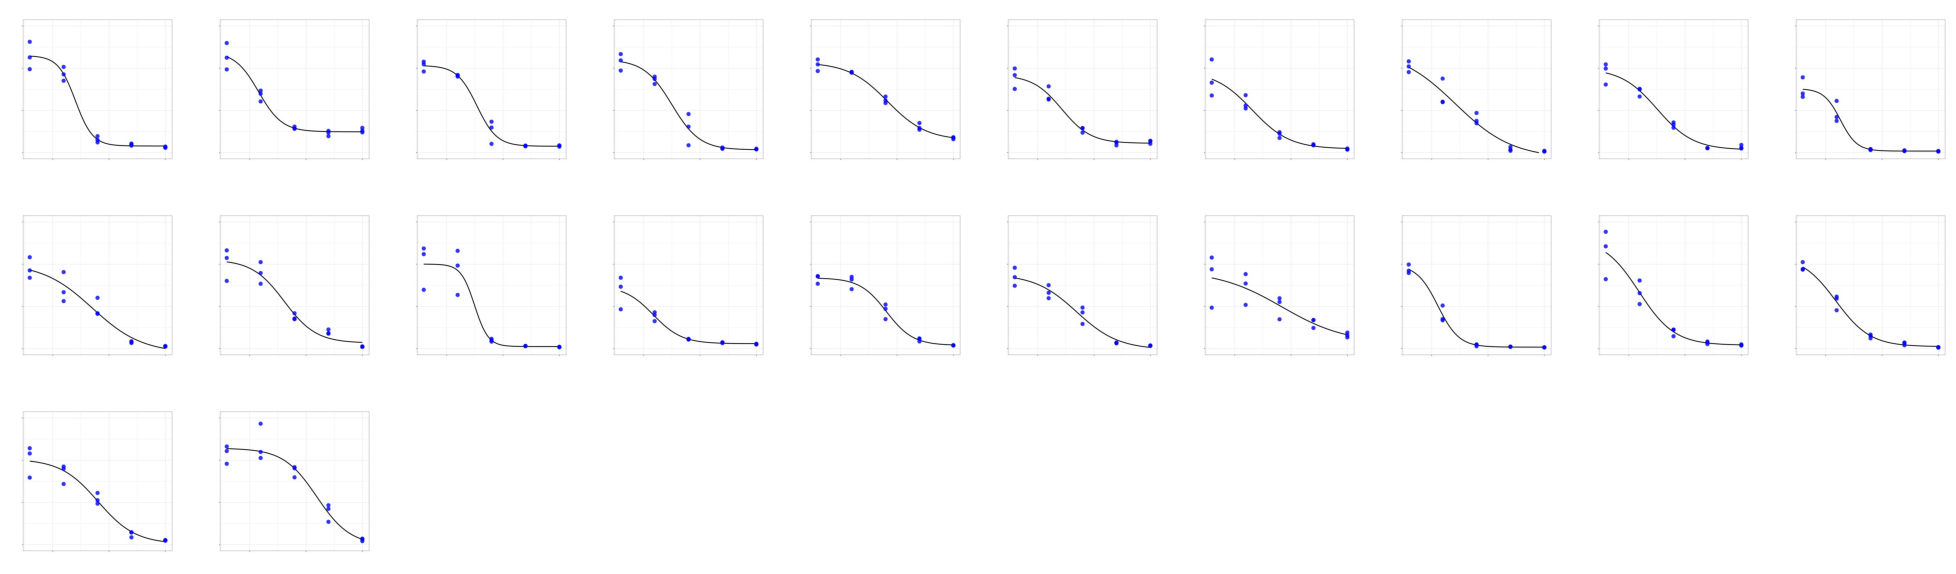

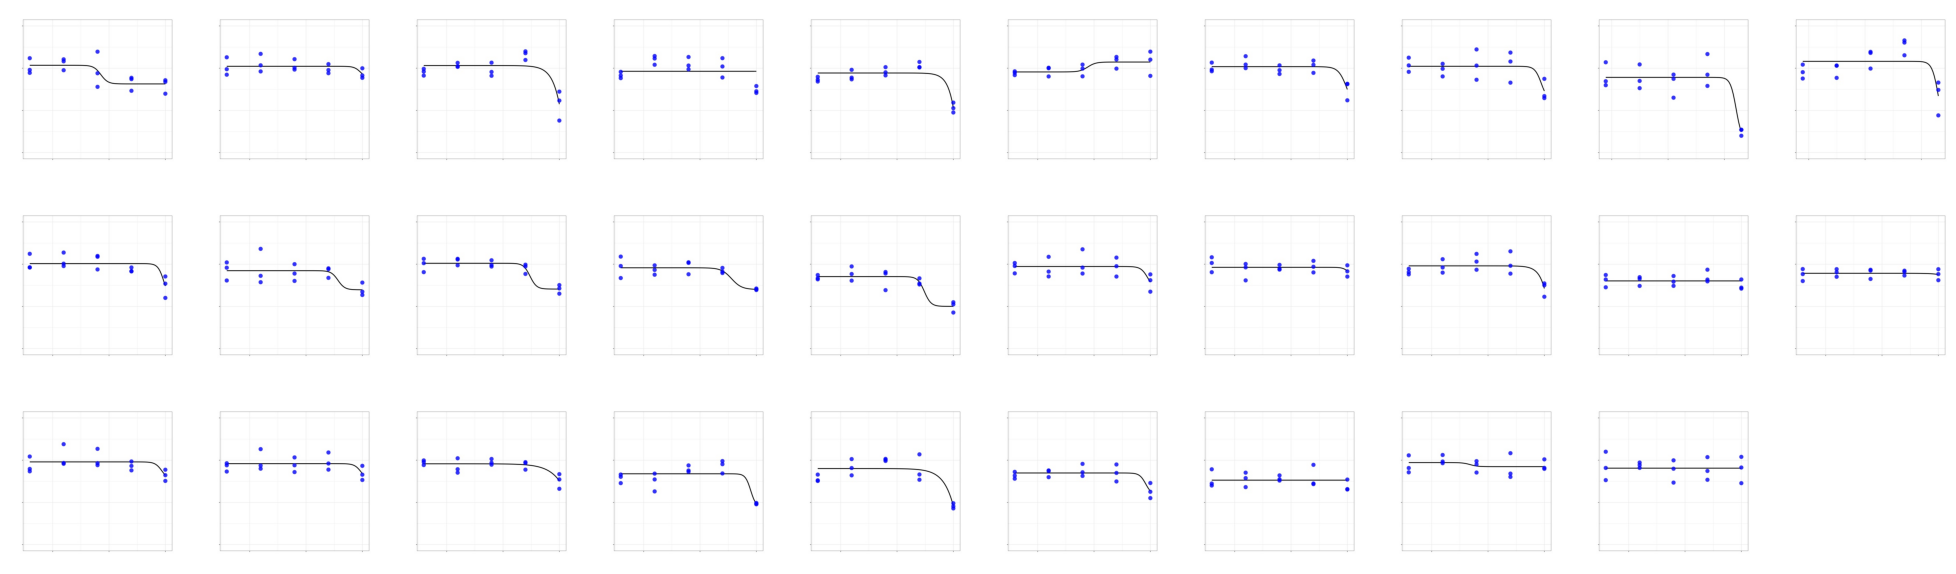

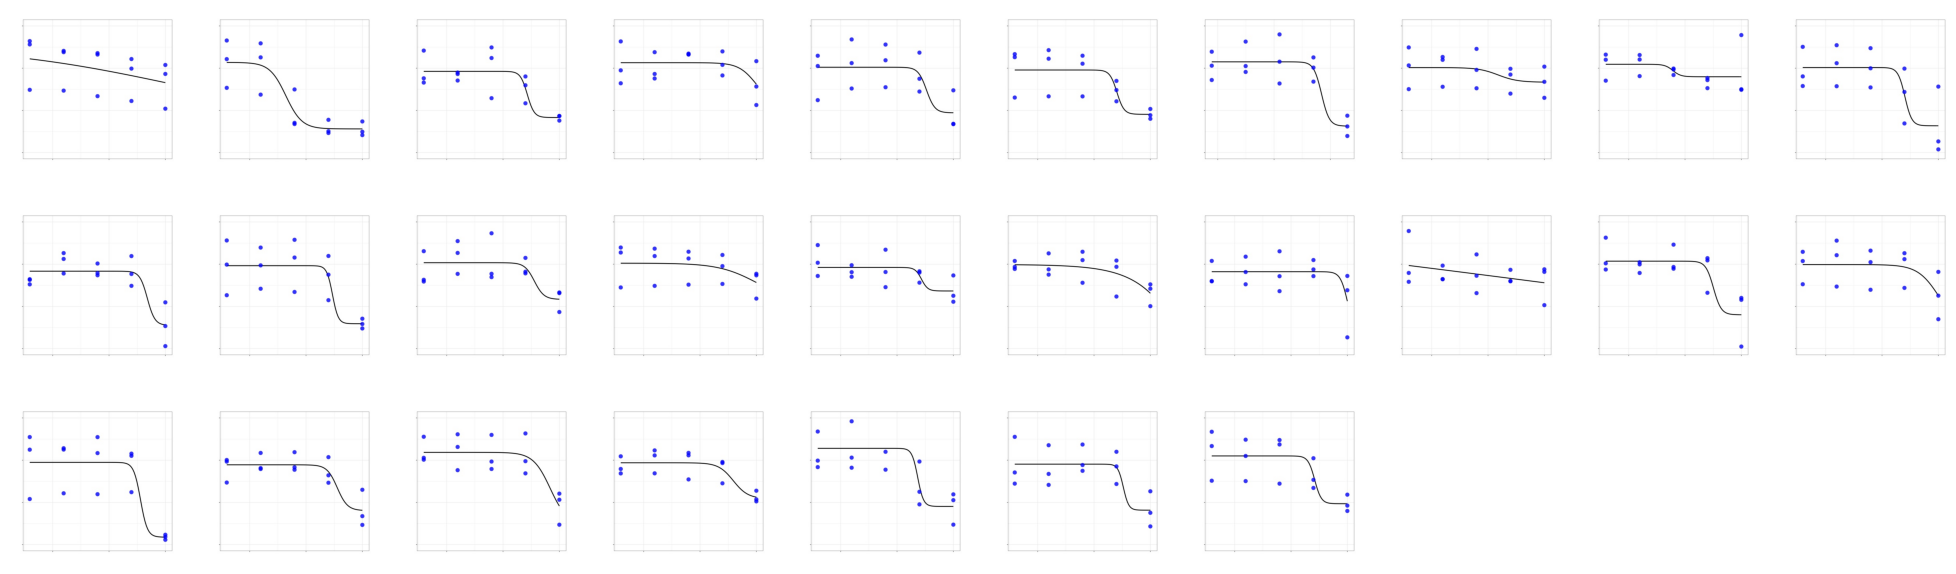

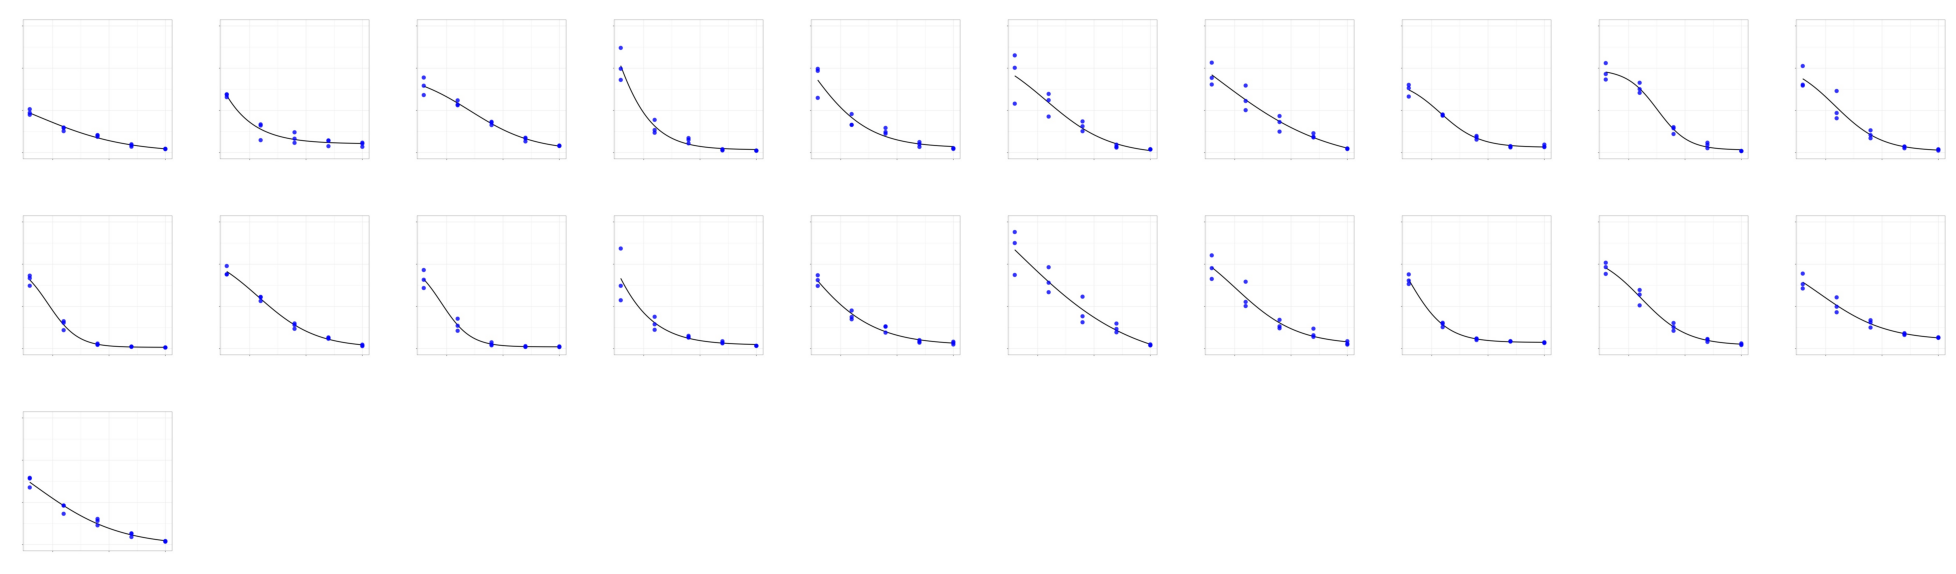

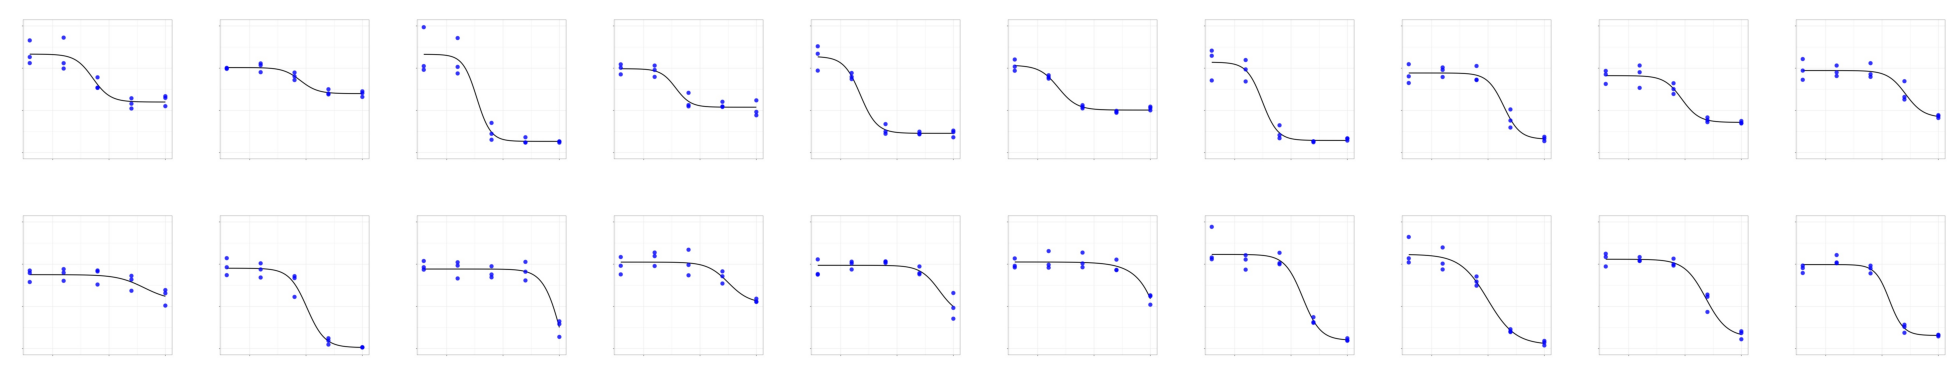

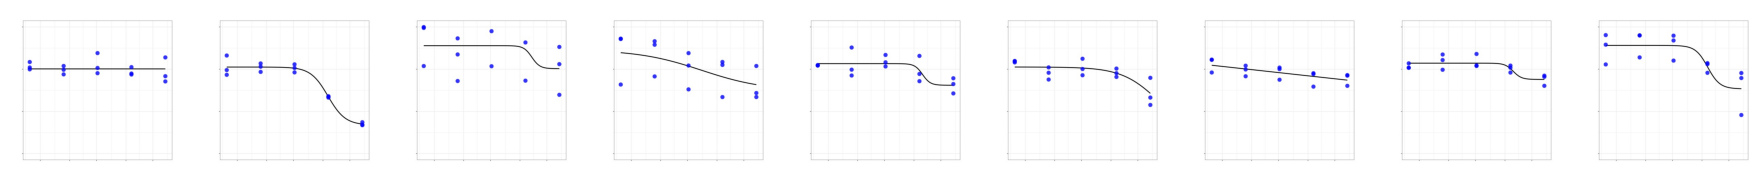

In [65]:
for cluster in range(len(groups)):
    print("CLUSTER ",cluster)
    view_cluster(cluster)